___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [ ]:
ad_data = pd.read_csv('/content/advertising.csv')

**Check the head of ad_data**

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [ ]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


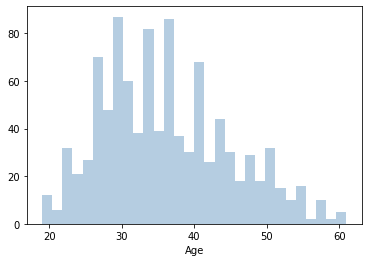

In [ ]:
sns.distplot(ad_data['Age'], bins = 30, kde = False, color = "steelblue")

**Create a jointplot showing Area Income versus Age.**

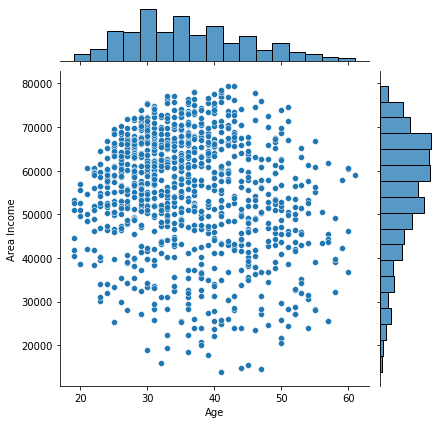

In [ ]:
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data);

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

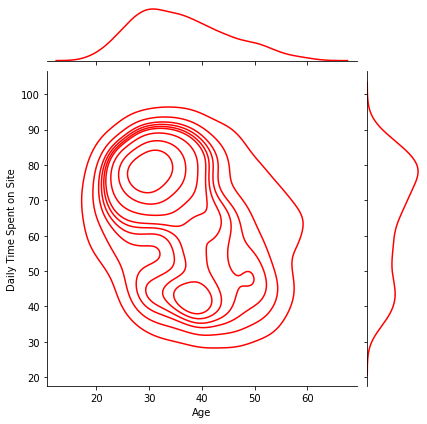

In [ ]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = ad_data, kind = 'kde', color = 'red');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

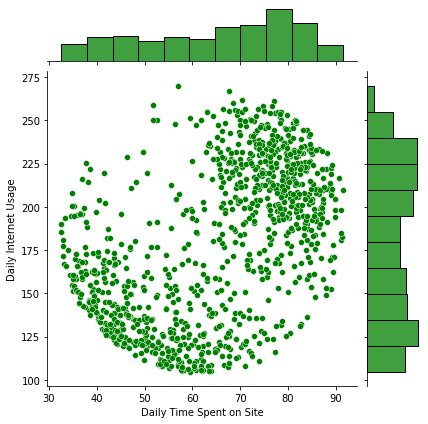

In [ ]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, color = 'green');

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

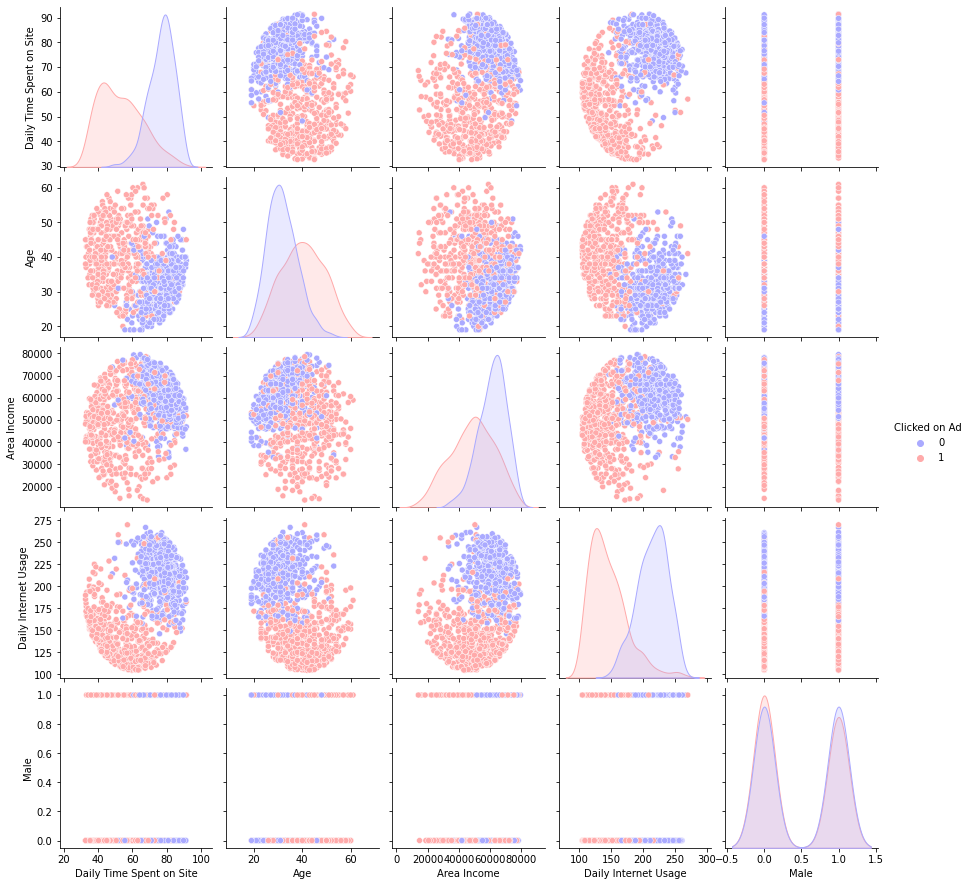

In [ ]:
sns.pairplot(ad_data, hue = 'Clicked on Ad', palette = 'bwr');

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [ ]:
X = ad_data.select_dtypes(['float64','int64']).drop('Clicked on Ad', axis=1)
y = ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

num_scaler=StandardScaler()
data = pd.DataFrame(num_scaler.fit_transform(X),columns=X.columns,index=X.index)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=24)

** Train and fit a logistic regression model on the training set.**

In [ ]:
logistic_model = LogisticRegression()
logistic_model2 = LogisticRegression()

logistic_model.fit(X_train,y_train)
logistic_model2.fit(X_train2,y_train2)

LogisticRegression()

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


grid = dict(solver = ['newton-cg', 'lbfgs', 'liblinear'], penalty = ['l2'], C= [100, 10, 1.0, 0.1, 0.01])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


grid_search = GridSearchCV(estimator=logistic_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train2,y_train2)


grid_search2 = GridSearchCV(estimator=logistic_model2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result2 = grid_search.fit(X_train,y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\n\n')
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Best: 0.970000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.970000 (0.016225) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.900952 (0.040057) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.894286 (0.032493) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.969048 (0.016113) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.899048 (0.038674) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.894286 (0.032493) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.969048 (0.017722) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.897619 (0.037085) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.894286 (0.032493) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.968095 (0.017176) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.896667 (0.035318) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.894286 (0.032493) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.968095 (0.017176) wit

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

## Predictions and Evaluations
** Now predict values for the testing data.**

In [ ]:
predictions = logistic_model.predict(X_test)
predictions2 = logistic_model2.predict(X_test)

** Create a Confusion Matrix for the model.**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       150
           1       0.94      0.87      0.90       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       150
           1       0.94      0.87      0.90       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN.fit(X_train,y_train)
KNN.predict(X_test)
print(classification_report(y_test,KNN.predict(X_test)))
KNN.fit(X_train2,y_train2)
print(classification_report(y_test,KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       150
           1       0.76      0.71      0.74       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       150
           1       0.76      0.71      0.74       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



##random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_train,y_train)
clf.predict(X_test)
print(classification_report(y_test,clf.predict(X_test)))
clf.fit(X_train2,y_train2)
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       150
           1       0.93      0.95      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       150
           1       0.93      0.95      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Great Job!